### Reminder:  Clear output before saving for commit.
otherwise merging will suck.


Main project requirements:
  * few plots per question 2 per question 6-8 plots in total
  * heading for each q and summary of findings under q
  * at least 1 linear regression on at least Q4.
  


In [1]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import seaborn as sns 

In [2]:
file_path = 'Data/database.csv'
df = pd.read_csv(file_path, low_memory=False)  #low memory imput to avoid warning message
# df.info()
# column notes:
# Species Quantity values: '1', '2-10', nan, '11-100', 'Over 100' 

In [37]:
subset_df = df[["Incident Year","Incident Month","Airport","Airport ID", "State","Aircraft","Aircraft Type", "Flight Phase", "Species Name","Species ID","Species Quantity"]]
subset_df.to_csv("Data/data_subset.csv")


# Which bird is the most dangerous 1990-2014?

In [ ]:
#removing "unknown" bird species, removing partial year data for 2015
birdType_df = subset_df[["Species Name","Species ID","Species Quantity"]].loc[(subset_df["Species Name"]!= "UNKNOWN MEDIUM BIRD") & (subset_df["Species Name"]!= "UNKNOWN SMALL BIRD") 
                                                                              & (subset_df["Species Name"]!= "UNKNOWN LARGE BIRD") & (subset_df["Species Name"]!= "UNKNOWN BIRD")
                                                                              & (subset_df["Incident Year"]!= 2015)]


# todo add labels, pretty up.  add thoughts on results
birdCounts = birdType_df["Species Name"].value_counts()

y_axis = birdCounts[:10]  
x_axis = birdCounts.index[:10]

plt.figure(figsize=(10,5))
plt.bar(x_axis, y_axis, color = "green")
plt.tight_layout()  
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,birdCounts.index[:10], rotation="vertical")

plt.xlabel('Bird Name') # Label the x axis 
plt.ylabel("Number of Bird Strikes ")  # Label the y axis
plt.title(" Which bird is the most dangerous 1990-2014? aka Mourning Dove ")

for i in range(len(y_axis)):
    plt.annotate(str(y_axis[i]), xy=(x_axis[i],y_axis[i]), ha='center', va='bottom')

plt.savefig("Images/DangerousMourningDove.png") # TODO The legend and axis names are put in the saved image.


plt.show()


#### Which airport or geographic area is more likely to have a bird/plane strike?
    * get fancy add google figure w/heat map possibly
    * Graph for states, or stacked one of all airports grouped by state


In [ ]:
subset_df

In [ ]:
# Jag's \/\/\/
subset_df["State"].value_counts().head(10)

# Get the numnber of occurances of each state
state_counts = df.State.value_counts()

# Split and Save the state names in a variable
states = state_counts.index

# Split and Save the counts in another variable
counts = state_counts.values

# Create barplot object
barplot = sns.barplot(x=states, y=counts)

sns.set(rc={'figure.figsize':(15,6)})
barplot = sns.barplot(x=states[:5], y=counts[:5])


In [ ]:
# Jag's ^^^




# todo add labels, pretty up.  add thoughts on results
stateCounts = subset_df["State"].value_counts()
stateCounts

y_axis = stateCounts[:5]  
x_axis = stateCounts.index[:5]

plt.figure(figsize=(10,5))
plt.bar(x_axis, y_axis, color = "pink")
plt.tight_layout()  
plt.xlabel('State Name')
plt.ylabel("Number of Bird Strikes")
 

for i in range(len(y_axis)):
    plt.annotate(str(y_axis[i]), xy=(x_axis[i],y_axis[i]), ha='center', va='bottom')


plt.show()


In [ ]:
# Selom \/\/\/ - Bird strikes that are increasing or decreasing over time? - 




In [57]:
#TODO need to clean up this file's first cells and delete the duplicate code from file 1 that builds subset df and just read in the subset df
# Alyssa  \/\/\/ Which phase of the flight reports the most bird strikes?

#species = pd.DataFrame(subset_df["Species Name"].unique())
#species.to_csv("Data/species_list.csv")
new = df.groupby(['Species Name', 'Species ID'])#.to_frame().reset_index()
new["Record ID"].count().to_frame().to_csv("Data/species_list.csv")


C:\Users\kunaual\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
#create animal kingdom column in dataframe
subset_wkingdom_df = subset_df
#most things in the list are birds, set everything to bird intially
subset_wkingdom_df["Animal_Kingdom"]= "BIRD"
#mammals have species id that starts w/1
subset_wkingdom_df["Animal_Kingdom"]= np.where(subset_wkingdom_df['Species ID'].str.startswith('1',na=False), "MAMMAL",subset_wkingdom_df["Animal_Kingdom"])
#repiles start with 2
subset_wkingdom_df["Animal_Kingdom"]= np.where(subset_wkingdom_df['Species ID'].str.startswith('2',na=False), "REPTILE",subset_wkingdom_df["Animal_Kingdom"])
subset_wkingdom_df.to_csv("Data/data_subset_wKingdom.csv")


C:\Users\kunaual\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\kunaual\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kunaual\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

## Which phase of the flight reports the most animal strikes?
todo add a bunch of stuff to discuss this q here

In [199]:
subset_wkingdom_df["Flight Phase"].value_counts()
flightphase= subset_wkingdom_df.groupby(['Flight Phase']) #, 'Animal_Kingdom'])
flightphase = flightphase['Incident Year'].count().reset_index().rename(columns={"Incident Year":"Count"})
flightphase = flightphase.sort_values(by='Count',ascending=False).reset_index(drop = True)

#the bottom 6 parts of flight make up only ~1% of the total, so pulled those together to new category "Other"
others_label=flightphase["Flight Phase"][6:]
others_total=flightphase.Count[6:].sum()
new_row = {'Flight Phase':'OTHER', 'Count':others_total}
#append row to the dataframe
flightphase = flightphase.append(new_row, ignore_index=True)
#reorder to move "other" row up to index 6
flightphase = flightphase.sort_values(by='Count',ascending=False).reset_index(drop = True)
flightphase

,Flight Phase,Count
0,APPROACH,48275
1,TAKEOFF RUN,21953
2,LANDING ROLL,20762
3,CLIMB,19692
4,DESCENT,3174
5,EN ROUTE,2989
6,OTHER,1957
7,LANDING,626
8,TAXI,397
9,DEPARTURE,369


In [202]:
#figure out how to make others label into simple text list
print(others_label)
print(f"Other category includes the following: {others_label}")

6       LANDING
7          TAXI
8     DEPARTURE
9         LOCAL
10      ARRIVAL
11       PARKED
Name: Flight Phase, dtype: object
Other category includes the following: 6       LANDING
7          TAXI
8     DEPARTURE
9         LOCAL
10      ARRIVAL
11       PARKED
Name: Flight Phase, dtype: object


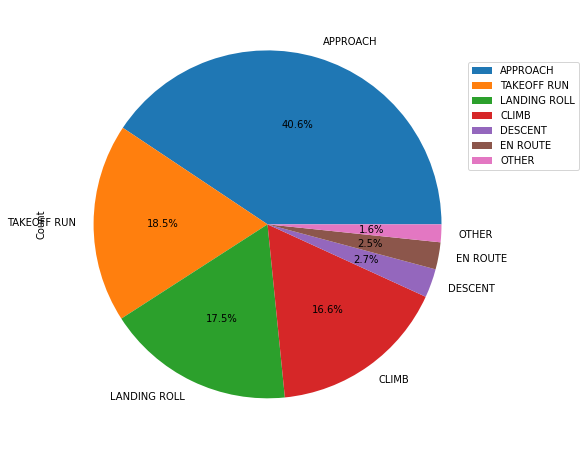

In [203]:
#plot data
pieLabels = flightphase["Flight Phase"][0:7]

pies = flightphase[0:7].plot.pie(y="Count",figsize=[10, 8],labels=pieLabels,autopct='%1.1f%%')
pies.set_aspect('equal')
pies.legend(loc='center left', bbox_to_anchor=(.95, .75)) #move legend off the pie



In [79]:
# Alyssa ^^^

subset_wkingdom_df.loc[subset_df["Species ID"].str.startswith('1',na=False)]

#subset_df.loc[subset_df["Species Name"] == "Moose"]

,Incident Year,Incident Month,Airport,Airport ID,State,Aircraft,Aircraft Type,Flight Phase,Species Name,Species ID,Species Quantity,Animal_Kingdom
12,1990,1,JOHN C TUNE ARPT,KJWN,TN,HAWKER-SDLY HS125,A,TAKEOFF RUN,WHITE-TAILED DEER,1G11,2-10,MAMMAL
20,1990,1,JACK BARSTOW,KIKW,MI,PA-28,A,LANDING ROLL,WHITE-TAILED DEER,1G11,1,MAMMAL
26,1990,1,ST. PAUL DOWNTOWN ARPT/HOLMAN FIELD,KSTP,MN,LEARJET-25,A,LANDING ROLL,WHITE-TAILED DEER,1G11,1,MAMMAL
56,1990,2,ROBT J MILLER AIR PARK,KMJX,NJ,PA-28,A,LANDING ROLL,WHITE-TAILED DEER,1G11,1,MAMMAL
98,1990,3,PRIVATE AIR STRIP,PVT,CA,PA-J3,A,LANDING ROLL,MULE DEER,1G12,1,MAMMAL
...,...,...,...,...,...,...,...,...,...,...,...,...
173990,2015,9,NaN,UNKN,NaN,CRJ700,A,NaN,VESPER BAT,1C21,1,MAMMAL
173992,2015,9,EL PASO INTL ARPT,KELP,TX,UNKNOWN,NaN,NaN,BLACK-TAILED JACKRABBIT,1D11,1,MAMMAL
173995,2015,9,RICHMOND INTL,KRIC,VA,CIRRUS SR 20/22,A,APPROACH,COYOTE,1F11,NaN,MAMMAL
174021,2015,9,NEWARK LIBERTY INTL ARPT,KEWR,NJ,DHC8 DASH 8,A,APPROACH,RED BAT,1C2101,1,MAMMAL
